In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('fulldata.csv')
test_df=pd.read_csv('test.csv')

In [3]:
X = data.drop(['SeriousDlqin2yrs', 'ID'],axis=1)
y = data['SeriousDlqin2yrs']
W = test_df.drop(['SeriousDlqin2yrs', 'ID'],axis=1)
z = test_df['SeriousDlqin2yrs']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

#对于不平衡分类问题    引入降采样模块
from imblearn.under_sampling import RandomUnderSampler

In [5]:
# Counter类的目的是用来跟踪值出现的次数
from collections import Counter
print ('Original dataset shape :', Counter(y))

Original dataset shape : Counter({0: 104619, 1: 6632})


In [6]:
#如前分析，0的数据有135800条，而1的数据只有9691条

In [7]:
rus = RandomUnderSampler(random_state=111)

# 直接降采样后返回采样后的数值
X_resampled, y_resampled = rus.fit_resample(X, y)
print ('Resampled dataset shape:', Counter(y_resampled))

Resampled dataset shape: Counter({0: 6632, 1: 6632})


In [8]:
#经过降采样之后，训练数据中label为0和1的数据各有9691条

In [9]:
# 划分训练集和测试集
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_resampled, y_resampled, random_state=111)
X_train_rus.shape, y_train_rus.shape

((9948, 10), (9948,))

In [10]:
# 画图
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--") # 画直线做参考
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")

## 开始训练+调参

In [11]:
#梯度提升决策树法
# for n in range(80,200,10):
#     gbc_clf_submission = GradientBoostingClassifier(n_estimators=n, learning_rate=0.05, max_depth=4,
#     random_state=42)
#     gbc_clf_submission.fit(X_train_rus,y_train_rus)
#     gbc_clf_proba = gbc_clf_submission.predict_proba(X_train_rus)
#     gbc_clf_scores = gbc_clf_proba[:,1]
#     print ('\n\nn_estimators:',n,',AUC Score :', roc_auc_score(y_train_rus, gbc_clf_scores))
#     #对训练集的分类效果作图
#     fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_train_rus, gbc_clf_scores)
#     plot_roc_curve(fpr_gbc, tpr_gbc)
#     #验证测试集合
#     gbc_val_proba = gbc_clf_submission.predict_proba(X_test_rus)
#     gbc_val_scores = gbc_val_proba[:,1]
#     print ('AUC Score :', roc_auc_score(y_test_rus, gbc_val_scores))
#     #对测试集的分类效果作图
#     fpr_gbc__, tpr_gbc__, thresh_gbc__ = roc_curve(y_test_rus, gbc_val_scores)
#     plot_roc_curve(fpr_gbc__, tpr_gbc__)


In [15]:
from sklearn.model_selection import GridSearchCV
param_search_1={'n_estimators':range(1,1002,100)}
sample=GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1,random_state=10),param_grid=param_search_1,scoring='roc_auc',n_jobs=-1,return_train_score=True,refit=True)
sample.fit(X_resampled,y_resampled)
sample.cv_results_,sample.best_params_,sample.best_score_

({'mean_fit_time': array([ 0.02479258,  2.01935153,  4.14353642,  6.69735513,  8.81228952,
         10.95106454, 13.72249312, 16.13341413, 17.20205011, 22.48855329,
         19.80408106]),
  'std_fit_time': array([1.59326881e-03, 1.85904931e-01, 3.62319674e-01, 5.60981021e-01,
         6.35379367e-01, 5.30850786e-01, 7.91423036e-01, 1.98907281e+00,
         4.18762153e-01, 2.03621981e+00, 1.29156392e+00]),
  'mean_score_time': array([0.0072    , 0.01019917, 0.01479974, 0.01880078, 0.02480001,
         0.02770228, 0.03163266, 0.04200897, 0.04120073, 0.03980265,
         0.03560004]),
  'std_score_time': array([0.00392086, 0.00040062, 0.0007473 , 0.00097943, 0.00511443,
         0.00153345, 0.00051884, 0.01275622, 0.00171974, 0.01389805,
         0.00750013]),
  'param_n_estimators': masked_array(data=[1, 101, 201, 301, 401, 501, 601, 701, 801, 901, 1001],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False],
         fill

In [16]:
param_search_1={'n_estimators':range(1,202,20)}
sample=GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1,random_state=10),param_grid=param_search_1,scoring='roc_auc',n_jobs=-1,return_train_score=True,refit=True)
sample.fit(X_resampled,y_resampled)
sample.cv_results_,sample.best_params_,sample.best_score_

({'mean_fit_time': array([0.02199965, 0.38039718, 0.77231803, 1.19454355, 1.56054487,
         1.92108445, 2.35820241, 3.33357868, 3.70977645, 3.87229481,
         3.81174049]),
  'std_fit_time': array([0.00227843, 0.00870977, 0.03235874, 0.10071984, 0.09945911,
         0.04878643, 0.11846162, 0.39064065, 0.35444416, 0.23464942,
         0.35479166]),
  'mean_score_time': array([0.00500088, 0.00600162, 0.00920119, 0.00840044, 0.00859981,
         0.0096014 , 0.01039996, 0.01893573, 0.01300063, 0.0134706 ,
         0.01056862]),
  'std_score_time': array([1.09723827e-03, 3.62709813e-06, 2.55954209e-03, 1.35651561e-03,
         4.88850989e-04, 4.90214768e-04, 4.91031444e-04, 8.86301773e-03,
         4.38072322e-03, 1.85070016e-03, 2.39703685e-03]),
  'param_n_estimators': masked_array(data=[1, 21, 41, 61, 81, 101, 121, 141, 161, 181, 201],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False],
         fill_value='?',
    

In [17]:
param_search_2={'max_depth':range(3,18,2),'min_samples_split':range(1,801,100)}
search_2=GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1,random_state=10,n_estimators=120), param_grid = param_search_2, scoring='roc_auc',n_jobs=-1)
search_2.fit(X_resampled,y_resampled)
search_2.cv_results_,search_2.best_params_,search_2.best_score_

D:\anaconda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.84033555 0.84053446 0.84009209 0.84054918 0.84057217
 0.84040643 0.84047348        nan 0.83888059 0.83944299 0.84020253
 0.84059959 0.84036478 0.84020917 0.84017814        nan 0.83627311
 0.83637541 0.83829383 0.83877563 0.83974117 0.83897989 0.8388069
        nan 0.83146309 0.83497079 0.8362379  0.83713024 0.8372454
 0.83792743 0.83762664        nan 0.8293071  0.83141031 0.83415066
 0.83591288 0.83603205 0.8371048  0.8363179         nan 0.82759309
 0.82970546 0.83154574 0.83529117 0.83462276 0.83597725 0.8362735
        nan 0.82447522 0.82944954 0.83157781 0.83230018 0.83380776
 0.83482165 0.83512705        nan 0.82419407 0.82723749 0.82984873
 0.83193665 0.8326023  0.83387899 0.83445974]
  warnings.warn(


({'mean_fit_time': array([7.00101852e-03, 2.48600116e+00, 2.47000031e+00, 2.59365244e+00,
         2.51341109e+00, 2.56977711e+00, 2.61665444e+00, 2.35012197e+00,
         8.19849968e-03, 4.37115264e+00, 4.03636236e+00, 4.30260501e+00,
         4.77748847e+00, 3.90088868e+00, 4.05586829e+00, 4.06799622e+00,
         8.80017281e-03, 5.82933421e+00, 5.57221689e+00, 6.44772477e+00,
         6.28333392e+00, 6.89016180e+00, 5.65106397e+00, 5.60532346e+00,
         9.40518379e-03, 8.21352587e+00, 7.61350069e+00, 7.28253551e+00,
         6.91969872e+00, 7.40614901e+00, 7.28069682e+00, 8.00275779e+00,
         1.01967335e-02, 9.53732662e+00, 9.12629905e+00, 9.19711747e+00,
         9.08370538e+00, 9.38527627e+00, 7.99656157e+00, 8.83377190e+00,
         9.19923782e-03, 1.02184416e+01, 1.10870022e+01, 1.19235861e+01,
         1.07077929e+01, 9.94262228e+00, 1.03557932e+01, 9.20376515e+00,
         9.20734406e-03, 1.22727505e+01, 1.12810872e+01, 1.07720073e+01,
         1.08622910e+01, 1.0275966

In [51]:
param_search_4={'max_features':range(0,15,1)}
search_4=GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1,random_state=10,n_estimators=120,min_samples_split=400,max_depth=5), param_grid = param_search_4, scoring='roc_auc',n_jobs=-1)
search_4.fit(X_resampled,y_resampled)
search_4.cv_results_,search_4.best_params_,search_4.best_score_

D:\anaconda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.8400935  0.84093878 0.84105584 0.84031049 0.84076047
 0.83956971 0.84025576 0.83998449 0.84028036 0.84032833        nan
        nan        nan        nan]
  warnings.warn(


({'mean_fit_time': array([0.00740147, 0.92076335, 1.56402712, 1.53159537, 2.10477824,
         2.52445254, 4.0198319 , 3.43164706, 3.44677553, 3.95872092,
         3.56888843, 0.0095993 , 0.00959854, 0.00939364, 0.00979962]),
  'std_fit_time': array([1.49780396e-03, 2.33022644e-01, 3.78597646e-01, 8.21986517e-02,
         6.04347690e-01, 4.03305098e-01, 7.36974928e-01, 5.59392715e-01,
         1.34081304e-01, 1.06887837e+00, 7.23018653e-01, 7.99292554e-04,
         8.00634685e-04, 4.95909507e-04, 7.47602164e-04]),
  'mean_score_time': array([0.        , 0.01762147, 0.01719942, 0.01471353, 0.0214097 ,
         0.01599894, 0.0205987 , 0.02039838, 0.01499939, 0.01199031,
         0.01200423, 0.        , 0.        , 0.        , 0.        ]),
  'std_score_time': array([0.00000000e+00, 5.26917247e-03, 5.07571347e-03, 7.45425164e-04,
         1.47948630e-02, 3.09865470e-03, 7.33285334e-03, 1.07985737e-02,
         3.01955036e-06, 2.90543606e-03, 2.28094075e-03, 0.00000000e+00,
         0.0000

In [52]:
param_search_5={'n_estimators':[120,240,480,960,960*2],'learning_rate':[0.1,0.05,0.025,0.0125,0.00625]}
search_5=GridSearchCV(estimator=GradientBoostingClassifier(random_state=10,min_samples_split=401,max_depth=5,max_features=3), param_grid = param_search_5, scoring='roc_auc',n_jobs=-1)
search_5.fit(X_resampled,y_resampled)
search_5.cv_results_,search_5.best_params_,search_5.best_score_

({'mean_fit_time': array([ 1.4207016 ,  3.15891538,  6.73652954, 12.59044318, 31.89013505,
          1.97859583,  3.84569759,  6.98513947, 17.90539713, 30.72370696,
          1.71927552,  3.45981588,  8.33013926, 16.5441854 , 34.7409513 ,
          2.34355259,  3.48434596,  6.84285278, 14.99226475, 29.66800103,
          2.16870179,  3.78450937,  8.80980477, 14.81322236, 25.20372119]),
  'std_fit_time': array([0.01693085, 0.3200524 , 1.15942469, 0.65167778, 4.15443658,
         0.30814807, 0.7677684 , 1.26652498, 2.23398944, 3.43237824,
         0.04242065, 0.23066386, 1.4719066 , 2.05751326, 2.01858866,
         0.43998335, 0.15158041, 0.06009386, 1.50286067, 3.23674362,
         0.40773501, 0.24215721, 1.57660245, 0.90013584, 1.59501649]),
  'mean_score_time': array([0.01360025, 0.03220086, 0.04664912, 0.08170834, 0.15810413,
         0.01658759, 0.02659912, 0.05300121, 0.07919817, 0.22696629,
         0.01850948, 0.03160014, 0.05239763, 0.09852982, 0.20764179,
         0.02221041, 0

train AUC Score: 0.8677278645422821
test AUC Score: 0.8354992323979017


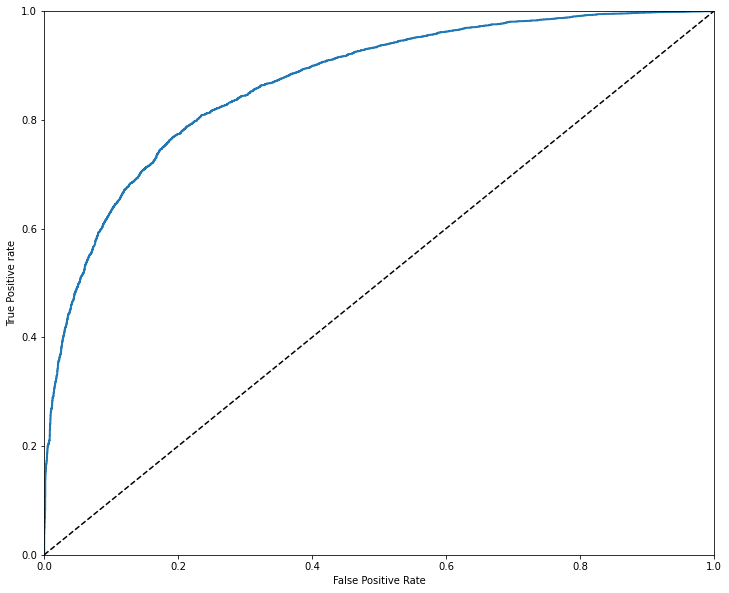

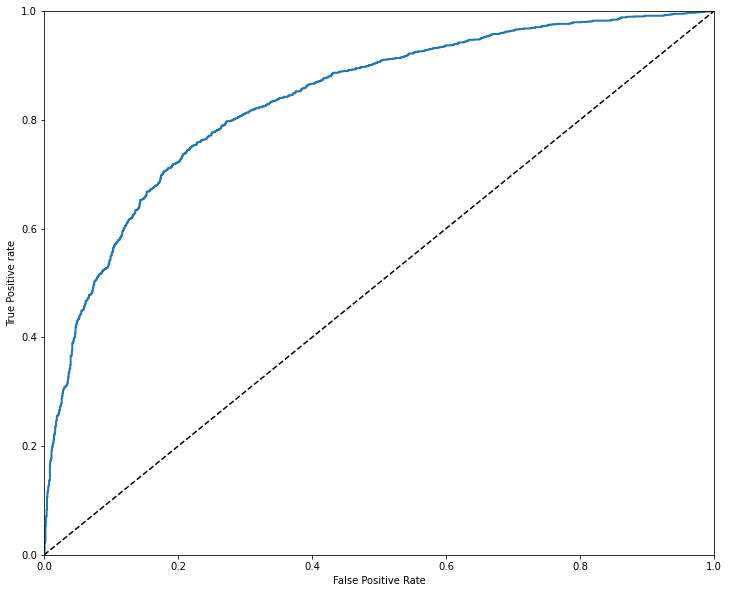

In [67]:
gbc_clf_submission = GradientBoostingClassifier(random_state=10,min_samples_split=400,max_depth=4,max_features=8,learning_rate=0.025,n_estimators=480)

gbc_clf_submission.fit(X_train_rus,y_train_rus)

gbc_clf_proba = gbc_clf_submission.predict_proba(X_train_rus)

gbc_clf_scores = gbc_clf_proba[:,1]

print ('train AUC Score:', roc_auc_score(y_train_rus, gbc_clf_scores))

#对训练集的分类效果作图
fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_train_rus, gbc_clf_scores)
plot_roc_curve(fpr_gbc, tpr_gbc)
#验证测试集合
gbc_val_proba = gbc_clf_submission.predict_proba(X_test_rus)
gbc_val_scores = gbc_val_proba[:,1]
print ('test AUC Score:', roc_auc_score(y_test_rus, gbc_val_scores))
#对测试集的分类效果作图
fpr_gbc__, tpr_gbc__, thresh_gbc__ = roc_curve(y_test_rus, gbc_val_scores)
plot_roc_curve(fpr_gbc__, tpr_gbc__)

In [68]:
def plot_feature_importances(model):
    plt.figure(figsize=(10,8))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.ylim(-1, n_features)

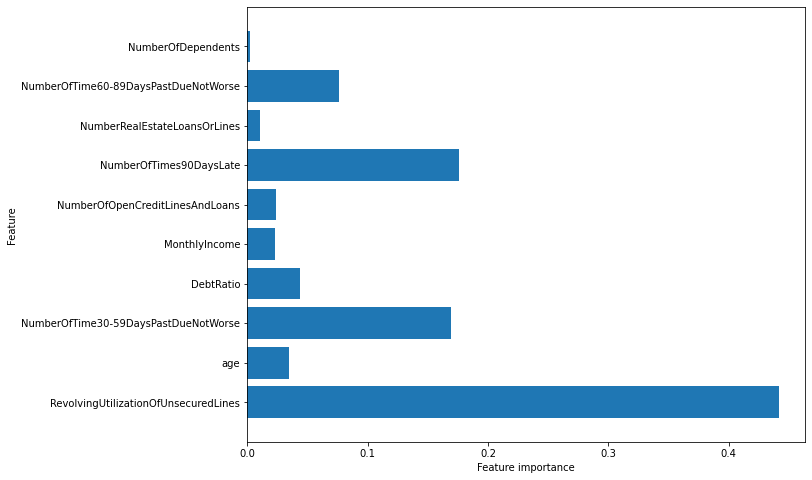

In [69]:
#梯度提升决策树法对各个特征的看重程度
plot_feature_importances(gbc_clf_submission)

In [56]:
submission_proba = gbc_clf_submission.predict_proba(W)
submission_probability = submission_proba[:, 1]
submission_probability.shape

(101503,)

In [57]:
#概率线性映射成评分

In [58]:
submission_scores=(1-submission_probability)*600+300

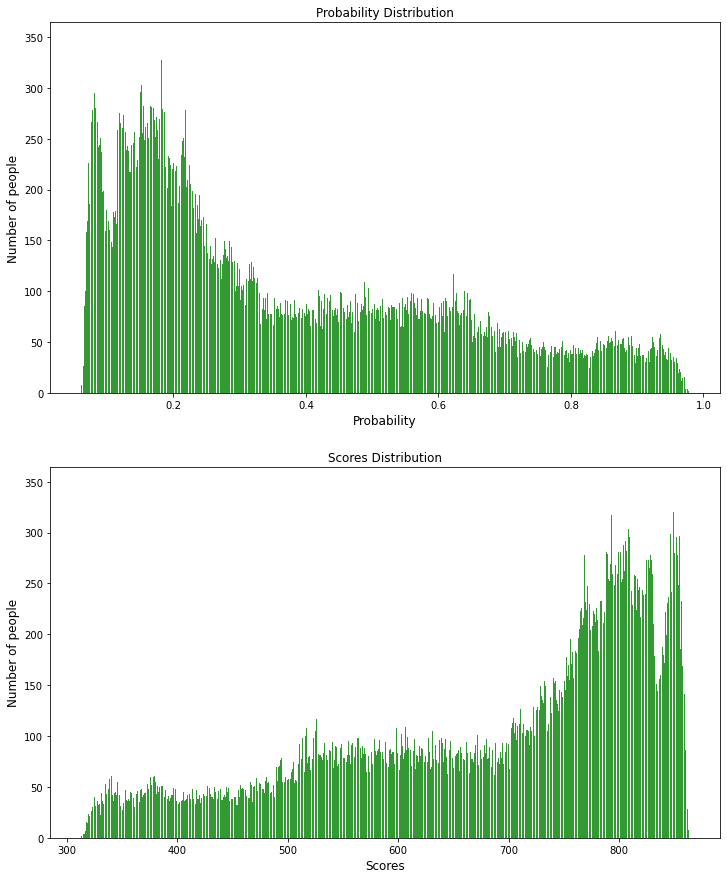

In [59]:
#预测的概率分布图
plt.figure(figsize=(12,15))
bins=1000

plt.subplot(211)
ax1= plt.hist(submission_probability, bins, color="green", alpha=0.8,rwidth=0.8)
plt.title("Probability Distribution")
plt.ylabel('Number of people', fontsize=12)
plt.xlabel('Probability', fontsize=12)

plt.subplot(212)
ax1= plt.hist(submission_scores, bins, color="green", alpha=0.8,rwidth=0.8)
plt.title("Scores Distribution")
plt.ylabel('Number of people', fontsize=12)
plt.xlabel('Scores', fontsize=12)
plt.show()

In [60]:
submission = pd.DataFrame( {'Probability': submission_probability,'Scores':submission_scores})
submission.to_csv('submission.csv', index=False)